In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [34]:
df = pd.read_csv('Datasets/Peliculas_Limpias.csv')

In [35]:
# Se convierte la columna Resumen a tipo String
df['Resumen'] = df['Resumen'].astype(str)

In [36]:
Titulo = ' '.join(df['Titulo'])
Resumen = ' '.join(df['Resumen'])

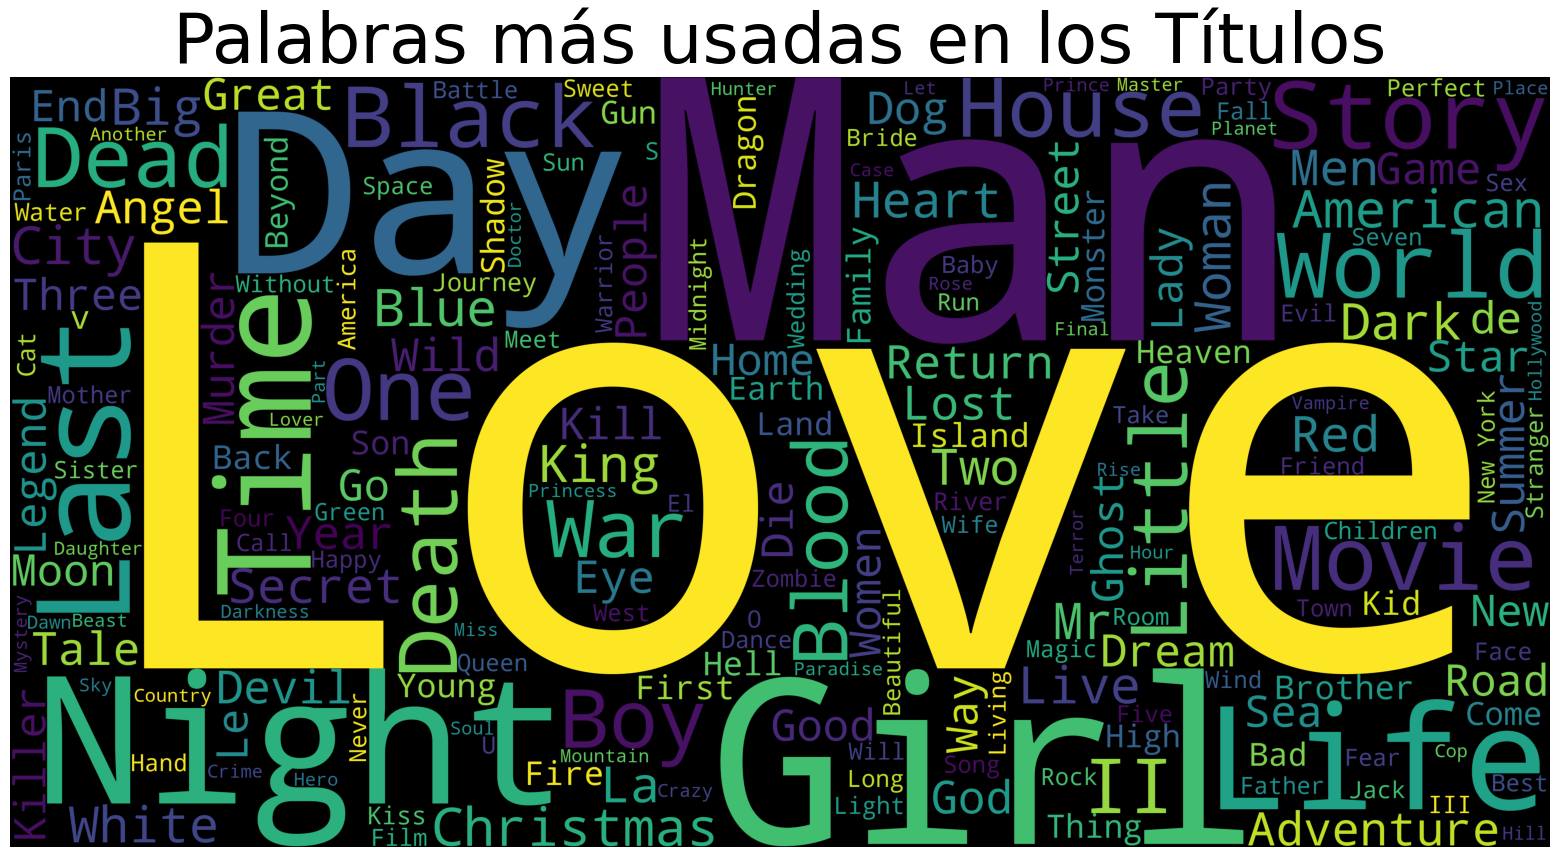

In [37]:
Nube_Titulo = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(Titulo)
plt.figure(figsize=(20,10))
plt.title('Palabras más usadas en los Títulos',fontsize=50)
plt.imshow(Nube_Titulo)
plt.axis('off')
plt.show()

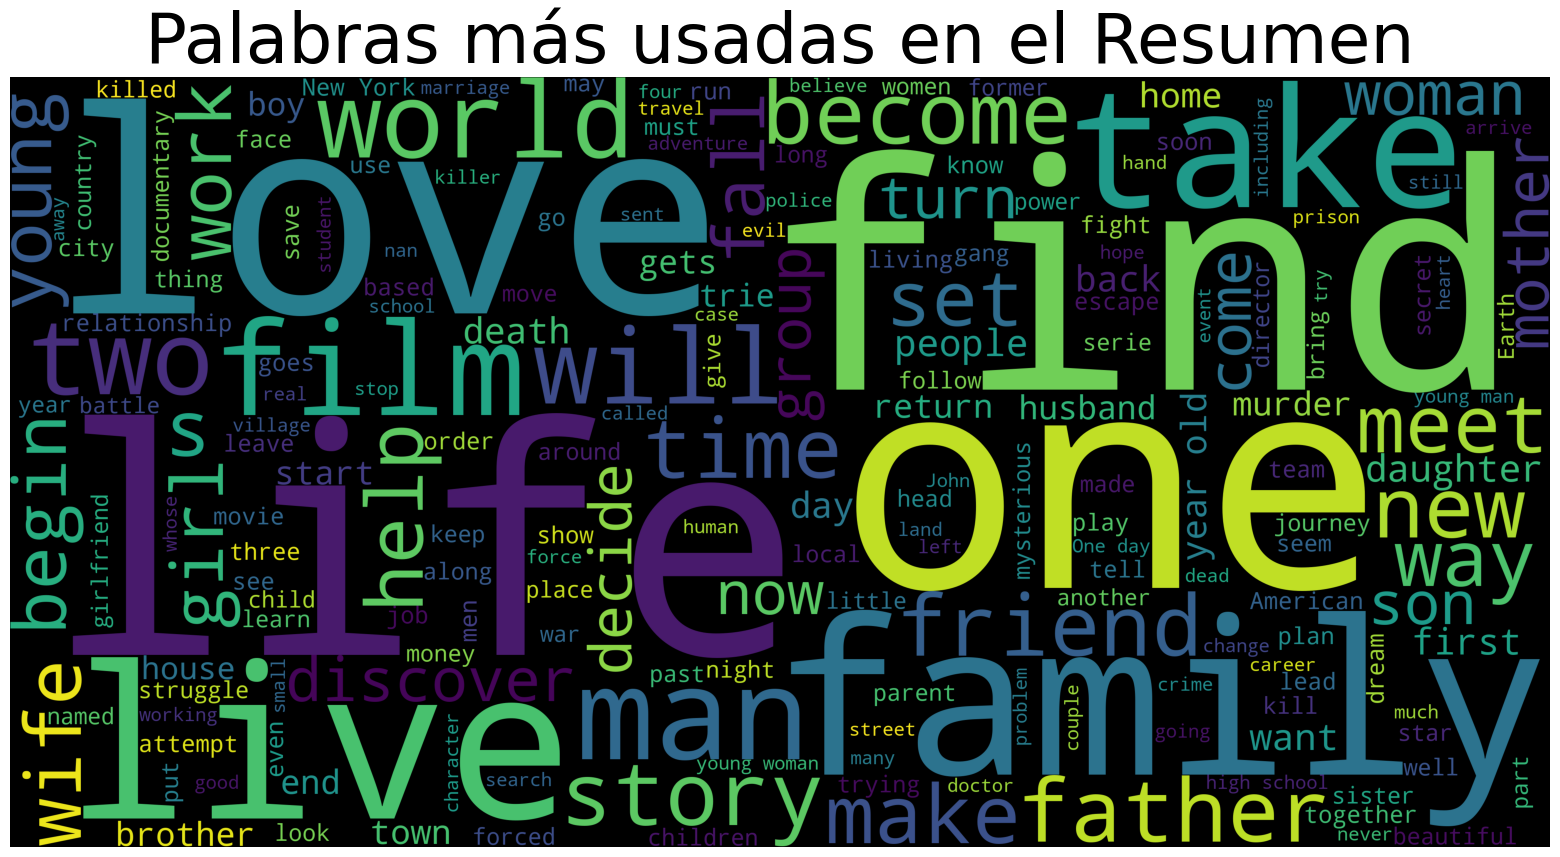

In [38]:
Nube_Resumen = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(Resumen)
plt.figure(figsize=(20,10))
plt.title('Palabras más usadas en el Resumen',fontsize=50)
plt.imshow(Nube_Resumen)
plt.axis('off')
plt.show()

In [39]:
df['Fecha_Lanzamiento'] = pd.to_datetime(df['Fecha_Lanzamiento'], format='%Y-%m-%d')

Miramos los datos nulos del DataFrame

In [40]:
df.isnull().sum().sort_values(ascending=False)

Franquicia            40954
Productora            11817
Pais_de_Produccion     6219
Traducciones           3774
Genero                 2384
Director                835
Duración                246
Estado                   80
Idioma                   11
Año_Lanzamiento           0
Conteo_Votos              0
Rating_Promedio           0
Titulo                    0
Ingresos                  0
Presupuesto               0
Fecha_Lanzamiento         0
Popularidad               0
Resumen                   0
Id                        0
Ganancia                  0
dtype: int64

In [41]:
#Rellenamos los datos nulos de la columna Franquicia.
df['Franquicia'] = df['Franquicia'].fillna('No posee franquicia')

Se rellenan los nulos de las demás columnas

In [42]:
df['Productora'] = df['Productora'].fillna('Sin productora')
df['Pais_de_Produccion'] = df['Pais_de_Produccion'].fillna('Sin país de producción')
df['Traducciones'] = df['Traducciones'].fillna('')
df['Genero'] = df['Genero'].fillna('No posee género')
df['Resumen'] = df['Resumen'].fillna('No posee resumen')
df['Director'] = df['Director'].fillna('No posee director')
df['Duración'] = df['Duración'].fillna(0)
df['Estado'] = df['Estado'].fillna('No posee estado')
df['Idioma'] = df['Idioma'].fillna('No posee Idioma')

Se cuentan todos los Id's duplicados

In [43]:
df.duplicated('Id').sum()

106

In [44]:
ids_duplicados = df[df.duplicated('Id')]['Id']
ids_duplicados.head(50)

677      105045
678      105045
679      105045
840      132641
841      132641
842      132641
954       22649
955       22649
956       22649
2571      84198
2572      84198
2573      84198
4122      10991
4123      10991
4124      10991
4367     110428
4368     110428
4369     110428
5144      15028
5145      15028
5146      15028
5552      12600
5553      12600
5554      12600
5730     109962
5731     109962
5732     109962
5888       4912
5889       4912
5890       4912
7370       5511
7371       5511
7372       5511
8096      23305
8097      23305
8098      23305
9605      69234
9606      69234
9607      69234
10451     14788
10452     14788
10453     14788
11190     77221
11191     77221
11192     77221
11380     13209
11381     13209
11382     13209
13260    159849
13261    159849
Name: Id, dtype: int64

Se pasan los Id's a tipo de dato Entero

In [45]:
df['Id'] = df['Id'].astype(int)

Se eliminan los Id's duplicados

In [46]:
df.drop_duplicates(subset=['Id'],inplace=True)

Se reestablece el índice

In [47]:
df=df.reset_index(drop=True)

# ____________________________________________________________________________________

# Datos relevantes

In [48]:
df

,Franquicia,Presupuesto,Genero,Id,Idioma,Resumen,Popularidad,Productora,Pais_de_Produccion,Fecha_Lanzamiento,Ingresos,Duración,Traducciones,Estado,Titulo,Rating_Promedio,Conteo_Votos,Director,Año_Lanzamiento,Ganancia
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,Toy Story,7.7,5415.0,John Lasseter,1995,12.451801
1,No posee franquicia,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Jumanji,6.9,2413.0,Joe Johnston,1995,4.043035
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,['English'],Released,Grumpier Old Men,6.5,92.0,Howard Deutch,1995,0.000000
3,No posee franquicia,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,['English'],Released,Waiting to Exhale,6.1,34.0,Forest Whitaker,1995,5.090760
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,['English'],Released,Father of the Bride Part II,5.7,173.0,Charles Shyer,1995,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,No posee franquicia,0.0,"['Drama', 'Action', 'Romance']",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",1991-05-13,0.0,104.0,['English'],Released,Robin Hood,5.7,26.0,John Irvin,1991,0.000000
45341,No posee franquicia,0.0,['Drama'],111109,tl,An artist struggles to finish his work while a...,0.178241,['Sine Olivia'],['Philippines'],2011-11-17,0.0,360.0,[''],Released,Century of Birthing,9.0,3.0,Lav Diaz,2011,0.000000
45342,No posee franquicia,0.0,"['Action', 'Drama', 'Thriller']",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,['American World Pictures'],['United States of America'],2003-08-01,0.0,90.0,['English'],Released,Betrayal,3.8,6.0,Mark L. Lester,2003,0.000000
45343,No posee franquicia,0.0,No posee género,227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],['Russia'],1917-10-21,0.0,87.0,,Released,Satan Triumphant,0.0,0.0,Yakov Protazanov,1917,0.000000


In [49]:
df['Duración'] = df['Duración'].astype(int)

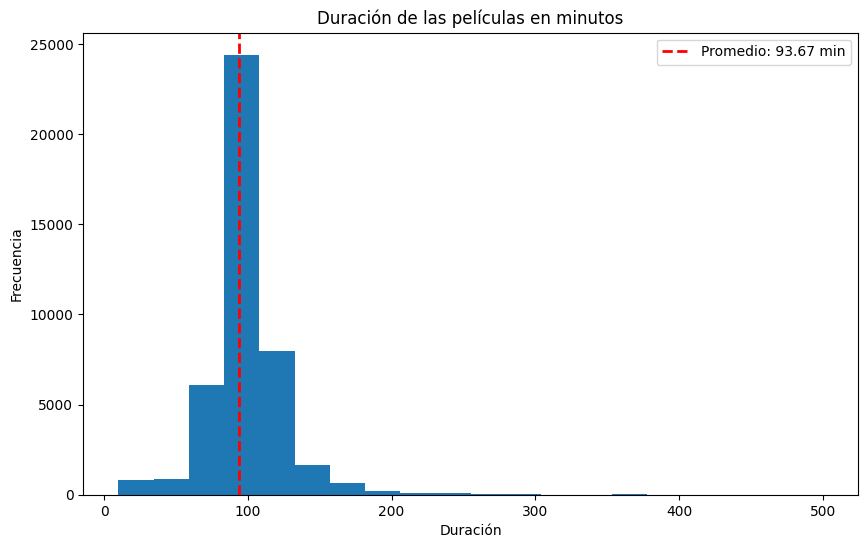

In [50]:
# Se filtran los valores dentro de un rango de 10 a 500
duracion_filtrada = df[(df['Duración'] >= 10) & (df['Duración'] <= 500)]['Duración']

plt.figure(figsize=(10, 6))
plt.hist(duracion_filtrada, bins=20)
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title('Duración de las películas en minutos')

# Paso 3: Calcula el promedio de la duración
promedio = df['Duración'].mean()

# Paso 4: Se agrega una línea vertical para el promedio
plt.axvline(promedio, color='r', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.2f} min')

plt.legend()
plt.show()
plt.show()


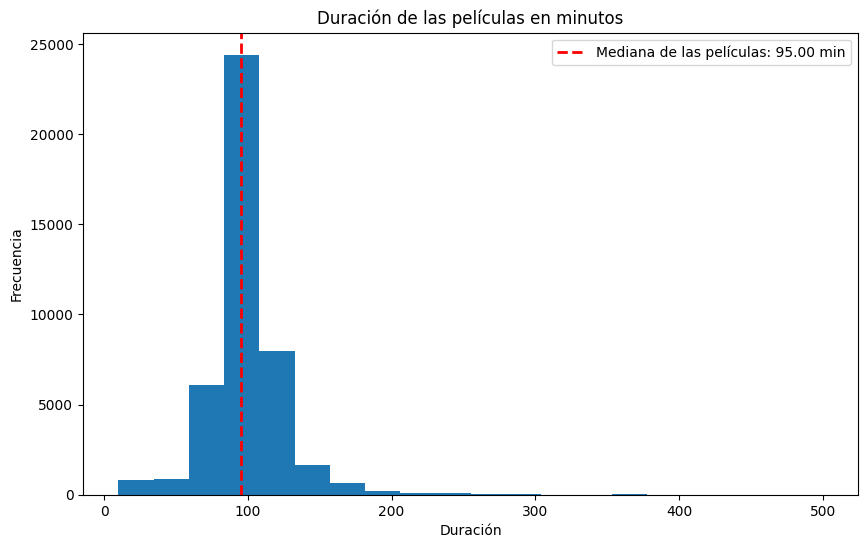

In [51]:
# Se filtran los valores dentro de un rango de 10 a 500
duracion_filtrada = df[(df['Duración'] >= 10) & (df['Duración'] <= 500)]['Duración']

plt.figure(figsize=(10, 6))
plt.hist(duracion_filtrada, bins=20)
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title('Duración de las películas en minutos')

# Paso 3: Calcula el promedio de la duración
promedio = df['Duración'].median()

# Paso 4: Agrega una línea vertical para el promedio
plt.axvline(promedio, color='r', linestyle='--', linewidth=2, label=f'Mediana de las películas: {promedio:.2f} min')

plt.legend()
plt.show()
plt.show()

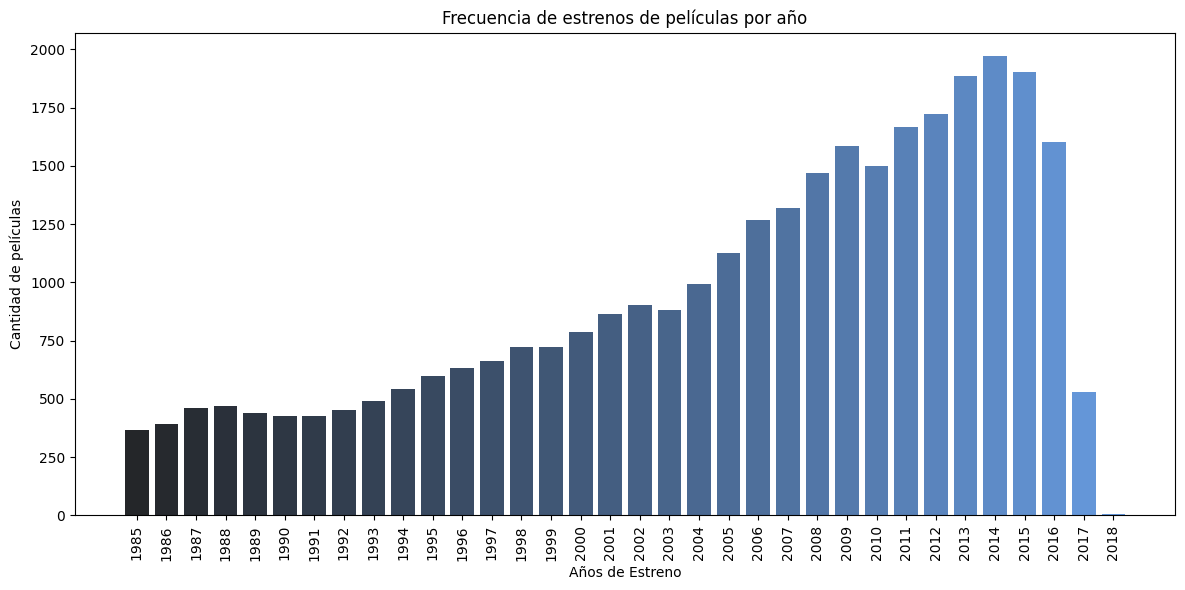

In [52]:
años = range(1985, 2018)

peliculas= df['Año_Lanzamiento'].value_counts().reindex(all_years, fill_value=0)

# Se crea el gráfico de barras
plt.figure(figsize=(12, 6))
colors = sns.dark_palette('#69d', len(peliculas))
bars = plt.bar(peliculas.index, peliculas.values, color=colors)

plt.xticks(rotation='vertical')

# Etiquetas y título del gráfico
plt.xlabel('Años de Estreno')
plt.ylabel('Cantidad de películas')
plt.title('Frecuencia de estrenos de películas por año')

# Se ajusta el espacio entre las etiquetas del eje x
plt.tight_layout()

plt.xticks(peliculas.index, peliculas.index)

plt.show()

### En estos gráficos podemos observar que:
#### 1. La mayoría de filmaciones cuentan con una duración de entre 50 y 150 minutos.
#### 2. EL promedio de las filmaciones tiene un promedio de 93 minutos
#### 3. La mediana de las filmaciones es de 95 minutos
#### 4. Año con año los estrenos de las filmaciones iba aumentando paulatinamente y en el 2,014 es el año con más estrenos